In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

import warnings 

from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
from scipy.stats import zscore 
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [2]:
kagle = dict(
    drivername="postgresql", 
    username="dsbc_student", 
    password="7*.8G9QH21", 
    host="142.93.121.174", 
    port="5432", 
    database="youtube"
)

engine = create_engine(URL(**kagle), echo=True)
youtube_df = pd.read_sql_query("SELECT * FROM youtube", con=engine) 
engine.dispose()

2019-11-14 15:21:41,632 INFO sqlalchemy.engine.base.Engine select version()
2019-11-14 15:21:41,634 INFO sqlalchemy.engine.base.Engine {}
2019-11-14 15:21:41,734 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-14 15:21:41,736 INFO sqlalchemy.engine.base.Engine {}
2019-11-14 15:21:41,833 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-14 15:21:41,835 INFO sqlalchemy.engine.base.Engine {}
2019-11-14 15:21:41,883 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-14 15:21:41,884 INFO sqlalchemy.engine.base.Engine {}
2019-11-14 15:21:41,930 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-14 15:21:41,931 INFO sqlalchemy.engine.base.Engine {}
2019-11-14 15:21:42,026 INFO sqlalchemy.engine.base.Engine SELECT * FROM youtube
2019-11-14 15:21:42,029 INFO sqlalchemy.engine.base.Engine {}


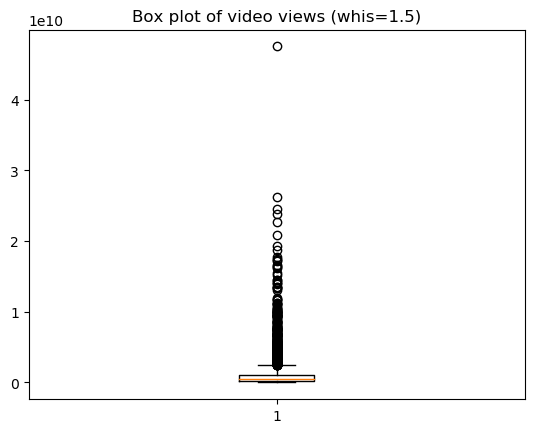

In [4]:
# Create a boxplot of video views
plt.style.use('default')
plt.boxplot(youtube_df["Video views"])
plt.title("Box plot of video views (whis=1.5)")
plt.show()

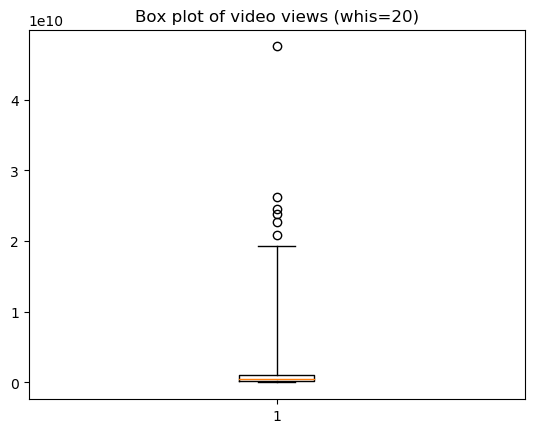

In [5]:
plt.boxplot(youtube_df["Video views"], whis=20)
plt.title("Box plot of video views (whis=20)")
plt.show()

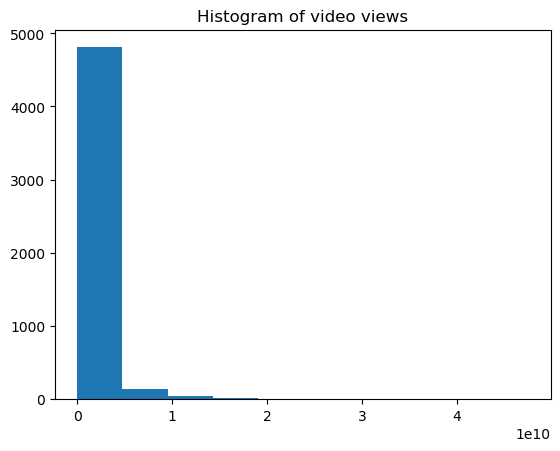

In [6]:
plt.hist(youtube_df["Video views"]) 
plt.title("Histogram of video views")
plt.show()

In [9]:
z_scores = zscore(youtube_df["Video views"]) 
for threshold in range(1,5):
    print(f"The score threshold is: {threshold}")
    print(f"The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print(f"Number of outliers is: {len((np.where(z_scores > threshold)[0]))}")

The score threshold is: 1
The indices of the outliers:
(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,   11,
         13,   14,   15,   16,   18,   19,   21,   22,   25,   26,   27,
         35,   37,   38,   39,   40,   41,   42,   43,   44,   46,   47,
         48,   49,   50,   51,   52,   53,   54,   57,   58,   59,   61,
         62,   63,   64,   66,   67,   68,   70,   72,   74,   75,   77,
         78,   81,   82,   83,   84,   85,   87,   88,   91,   93,   95,
         98,   99,  105,  106,  111,  112,  113,  114,  116,  120,  121,
        122,  123,  125,  126,  127,  130,  131,  135,  137,  138,  143,
        145,  146,  147,  149,  151,  154,  155,  158,  165,  167,  170,
        171,  172,  174,  176,  182,  184,  187,  193,  198,  200,  201,
        208,  210,  212,  218,  224,  227,  228,  229,  241,  242,  244,
        245,  248,  249,  254,  256,  257,  260,  261,  264,  265,  266,
        268,  269,  270,  271,  273,  277,  282,  283,  284,  287,  

In [13]:
"""
    NumPy's percentile() method returns the values of the given percentiles.  In 
our case, we give 75 and 25 as parameters which correspond to the third and the first
quartiles.
"""
q75, q25 = np.percentile(youtube_df["Video views"], [75, 25])
iqr = q75 - q25 

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    outliers = len((np.where((youtube_df["Video views"] > max_val) 
                      | (youtube_df["Video views"] < min_val))[0]))
    print(f"The score threshold is: {threshold}") 
    print(f"Number of outliers is {outliers}")

The score threshold is: 1.0
Number of outliers is 624
The score threshold is: 1.5
Number of outliers is 475
The score threshold is: 2.0
Number of outliers is 371
The score threshold is: 2.5
Number of outliers is 296
The score threshold is: 3.0
Number of outliers is 242
The score threshold is: 3.5
Number of outliers is 209
The score threshold is: 4.0
Number of outliers is 182
The score threshold is: 4.5
Number of outliers is 151


In [15]:
"""
    We apply one-way winsorization to the highest end of the value distribution.  As 
we have a lot of extreme values, we set the values of the outliers to the value of 
the 90th percentile.
"""
winsorized_views = winsorize(youtube_df["Video views"], (0,0.10))

winsorized_views

masked_array(data=[2468241402, 2468241402, 2468241402, ...,  311758426,
                     14563764,   73312511],
             mask=False,
       fill_value=999999,
            dtype=int64)

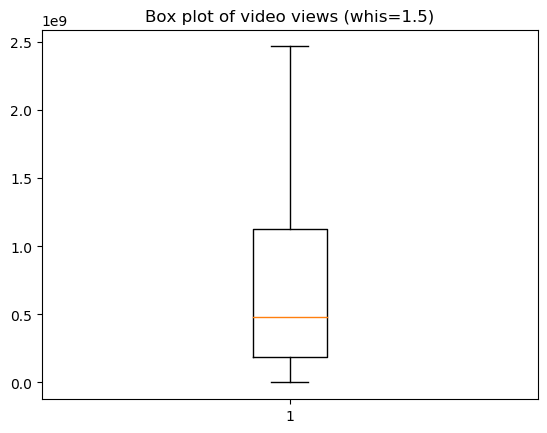

In [16]:
# Visualize the winsorized data using a box plot
plt.boxplot(winsorized_views) 
plt.title("Box plot of video views (whis=1.5)")
plt.show()

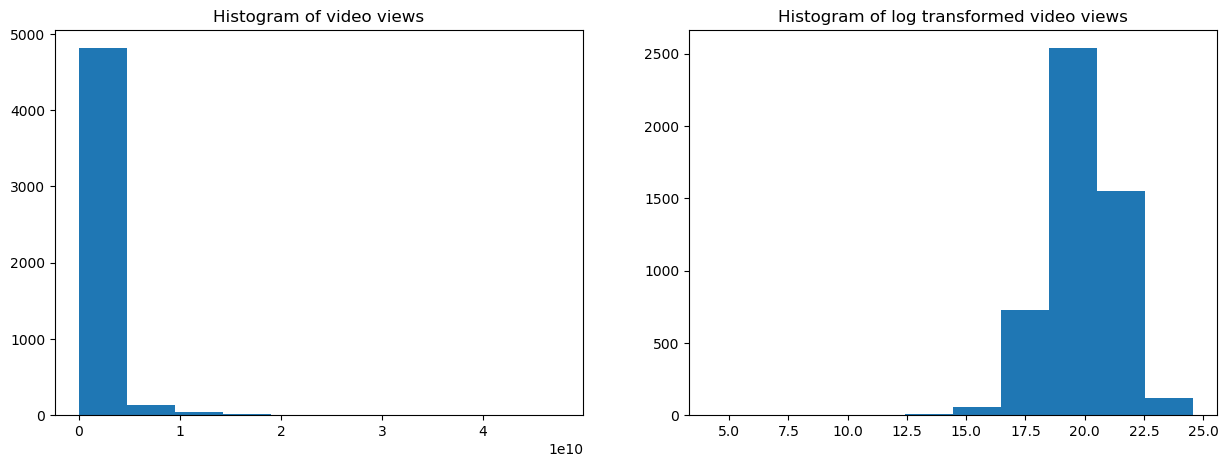

In [17]:
# Transforming outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
plt.hist(youtube_df['Video views'])
plt.title("Histogram of video views")

plt.subplot(1,2,2)
plt.hist(np.log(youtube_df["Video views"])) 
plt.title("Histogram of log transformed video views")
plt.show()

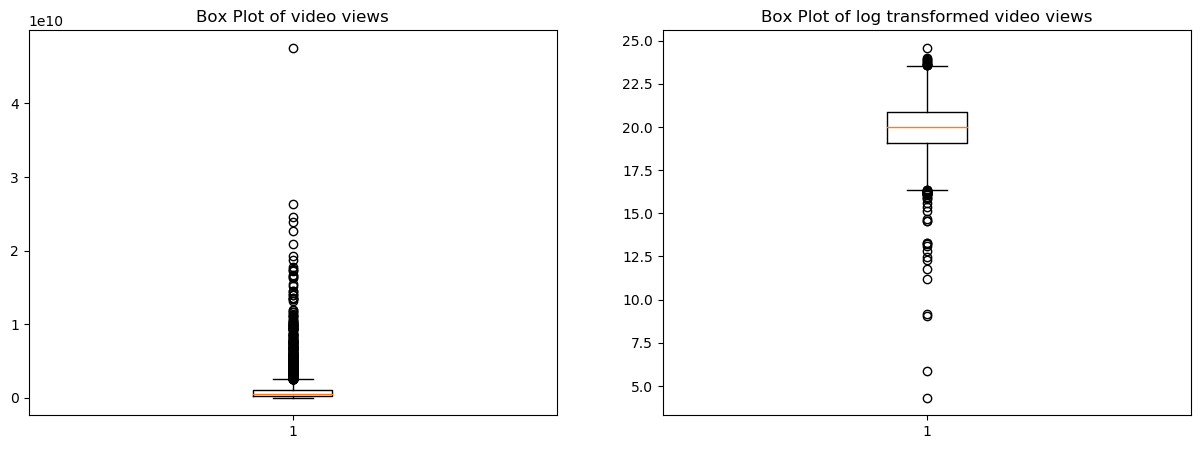

In [18]:
# Now look at blox plots of the origional and log transformed data
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(youtube_df["Video views"]) 
plt.title("Box Plot of video views")

plt.subplot(1,2,2)
plt.boxplot(np.log(youtube_df["Video views"]))
plt.title("Box Plot of log transformed video views")
plt.show()

In [21]:
"""
    Now take the log of the video views and calculate the quartiles accordingly.
"""
q75, q25 = np.percentile(np.log(youtube_df["Video views"]), [75, 25]) 
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    outliers = len((np.where((np.log(youtube_df["Video views"]) > max_val) 
                      | (np.log(youtube_df["Video views"]) < min_val))[0]))
    print(f"The score threshold is: {threshold}")
    print(f"Number of outliers is: {outliers}")

The score threshold is: 1.0
Number of outliers is: 326
The score threshold is: 1.5
Number of outliers is: 58
The score threshold is: 2.0
Number of outliers is: 19
The score threshold is: 2.5
Number of outliers is: 14
The score threshold is: 3.0
Number of outliers is: 13
The score threshold is: 3.5
Number of outliers is: 8
The score threshold is: 4.0
Number of outliers is: 6
The score threshold is: 4.5
Number of outliers is: 4


# Assignment

In [22]:
kagle = dict(
    drivername="postgresql", 
    username="dsbc_student", 
    password="7*.8G9QH21",
    host="142.93.121.174", 
    port="5432", 
    database="useducation"
)

engine=create_engine(URL(**kagle), echo=True)

education_df = pd.read_sql_query("SELECT * FROM useducation", con=engine)

engine.dispose()

2019-11-14 22:16:22,882 INFO sqlalchemy.engine.base.Engine select version()
2019-11-14 22:16:22,885 INFO sqlalchemy.engine.base.Engine {}
2019-11-14 22:16:22,987 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-14 22:16:22,988 INFO sqlalchemy.engine.base.Engine {}
2019-11-14 22:16:23,107 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-14 22:16:23,109 INFO sqlalchemy.engine.base.Engine {}
2019-11-14 22:16:23,172 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-14 22:16:23,173 INFO sqlalchemy.engine.base.Engine {}
2019-11-14 22:16:23,225 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-14 22:16:23,227 INFO sqlalchemy.engine.base.Engine {}
2019-11-14 22:16:23,329 INFO sqlalchemy.engine.base.Engine SELECT * FROM useducation
2019-11-14 22:16:23,330 INFO sqlalchemy.engine.base.Engine {}


_1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?_

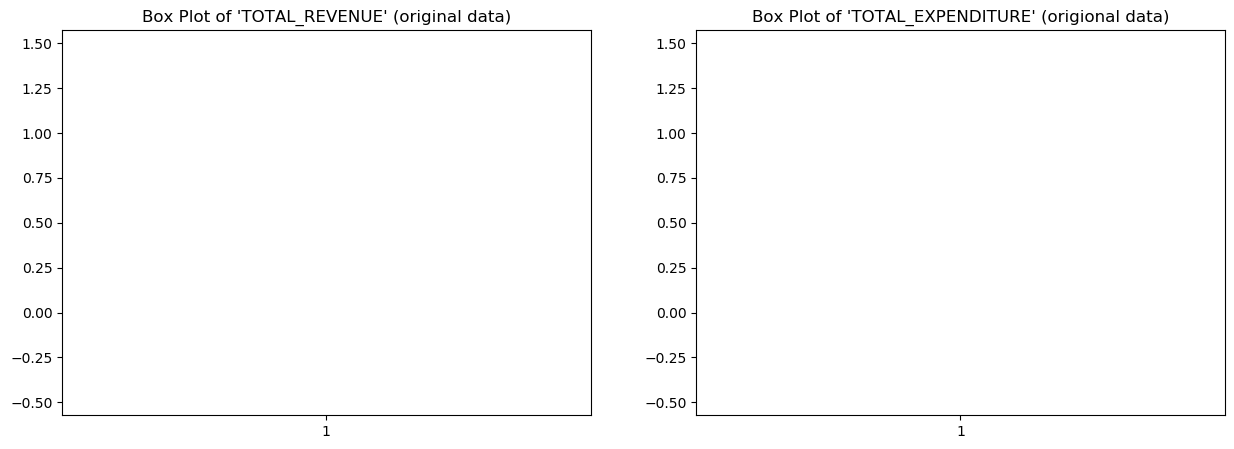

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(education_df["TOTAL_REVENUE"]) 
plt.title("Box Plot of 'TOTAL_REVENUE' (original data)")

plt.subplot(1,2,2)
plt.boxplot(education_df["TOTAL_EXPENDITURE"])
plt.title("Box Plot of 'TOTAL_EXPENDITURE' (origional data)")

plt.show()

In [26]:
education_df["TOTAL_REVENUE"].sample(n=10)

1043     1650621.0
188      2401541.0
353       793101.0
241     26026366.0
635      2138137.0
284      2274700.0
21       5517659.0
375      1328572.0
614       965778.0
622      8931497.0
Name: TOTAL_REVENUE, dtype: float64

# Assignment

In [2]:
kagle = dict(
    drivername='postgresql', 
    username='dsbc_student', 
    password='7*.8G9QH21',
    host='142.93.121.174',
    port='5432',
    database='useducation'
)

engine=create_engine(URL(**kagle), echo=True)

education_df = pd.read_sql_query("SELECT * FROM useducation", con=engine)

engine.dispose()

2019-11-16 09:31:42,739 INFO sqlalchemy.engine.base.Engine select version()
2019-11-16 09:31:42,740 INFO sqlalchemy.engine.base.Engine {}
2019-11-16 09:31:42,839 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-16 09:31:42,840 INFO sqlalchemy.engine.base.Engine {}
2019-11-16 09:31:42,941 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-16 09:31:42,943 INFO sqlalchemy.engine.base.Engine {}
2019-11-16 09:31:42,994 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-16 09:31:42,996 INFO sqlalchemy.engine.base.Engine {}
2019-11-16 09:31:43,046 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-16 09:31:43,049 INFO sqlalchemy.engine.base.Engine {}
2019-11-16 09:31:43,159 INFO sqlalchemy.engine.base.Engine SELECT * FROM useducation
2019-11-16 09:31:43,160 INFO sqlalchemy.engine.base.Engine {}


In [14]:
# Address null values in the data
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [15]:
education_df.sample(n=10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1093,2012_WEST_VIRGINIA,WEST_VIRGINIA,2012,282088.0,3970941.0,432223.0,2014017.0,1524701.0,3536971.0,1893954.0,...,20181.0,20521.0,18703.0,164805.0,80673.0,261259.0,NaN,NaN,NaN,NaN
630,2004_CONNECTICUT,CONNECTICUT,2004,552505.0,7276945.0,358769.0,2520724.0,4397452.0,7087023.0,3896977.0,...,42652.0,45072.0,38340.0,349835.0,173221.0,535504.0,NaN,NaN,NaN,NaN
40,1992_RHODE_ISLAND,RHODE_ISLAND,1992,NaN,883073.0,43545.0,329810.0,509718.0,863404.0,556787.0,...,11129.0,10204.0,8244.0,90758.0,37931.0,129187.0,215.449248,265.907109,219.940098,NaN
647,2004_MINNESOTA,MINNESOTA,2004,822245.0,8688315.0,507014.0,6019336.0,2161965.0,8963393.0,4506036.0,...,59338.0,66016.0,71636.0,488617.0,280056.0,779846.0,NaN,NaN,NaN,NaN
1480,2017_NORTH_CAROLINA,NORTH_CAROLINA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.951393,281.926028,223.930906,264.157584
1426,1996_DOD,DOD,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7249.0,5306.0,2860.0,56212.0,15250.0,72911.0,NaN,NaN,NaN,NaN
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1221,2015_MICHIGAN,MICHIGAN,2015,1345009.0,19025996.0,1582706.0,10510346.0,6932944.0,17742903.0,9040821.0,...,111267.0,113640.0,114700.0,887682.0,482540.0,1419183.0,235.728894,278.168652,216.306630,267.905530
1400,1993_AMERICAN_SAMOA,AMERICAN_SAMOA,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1056.0,873.0,809.0,8255.0,3451.0,13369.0,NaN,NaN,NaN,NaN
591,2003_MAINE,MAINE,2003,203848.0,2162605.0,163516.0,874208.0,1124881.0,2154117.0,1255095.0,...,14841.0,17321.0,14538.0,123589.0,62659.0,188045.0,237.615710,281.903773,223.859494,251.284802


In [16]:
# The "PRIMARY_KEY" & "STATE" columns appear to be categorical columns split them off and examine the separately
categorical_cols = education_df.select_dtypes(include='object').columns
continuous_cols = education_df.select_dtypes(exclude='object').columns

# Create some variables for calculation
df_len = len(education_df)
max_col = len(max(education_df.columns, key=len))

In [17]:
for col in categorical_cols:
    vals = sorted(education_df[col].unique(), key=len)
    print(f"first five shortest strings in '{col}': {vals[:5]} \n")    

# Look at null value information for continuous variables
for col in categorical_cols:
    empty_strings = len(education_df.loc[education_df[col]==''])
    nulls = education_df[col].isna().sum()
    tot_nulls = empty_strings + nulls
    pct_nan = tot_nulls*100/df_len
    print(f"{col:<{max_col}}: {tot_nulls:>{5}} nulls | percent null: {pct_nan:>{5}.2f}")

first five shortest strings in 'PRIMARY_KEY': ['2012_BI', '2012_DD', '1998_BI', '1998_DD', '1998_AS'] 

first five shortest strings in 'STATE': ['BI', 'DD', 'AS', 'GU', 'MP'] 

PRIMARY_KEY                 :     0 nulls | percent null:  0.00
STATE                       :     0 nulls | percent null:  0.00


In [18]:
# Look a null value information for continuous variables
for col in continuous_cols:
    nulls = education_df[col].isnull().sum()
    pct_null = nulls*100/df_len
    print(f"{col:<{max_col}}: {nulls:>{5}} nulls | percent null: {pct_null:>{5}.2f}")

YEAR                        :     0 nulls | percent null:  0.00
ENROLL                      :   263 nulls | percent null: 17.63
TOTAL_REVENUE               :   212 nulls | percent null: 14.21
FEDERAL_REVENUE             :   212 nulls | percent null: 14.21
STATE_REVENUE               :   212 nulls | percent null: 14.21
LOCAL_REVENUE               :   212 nulls | percent null: 14.21
TOTAL_EXPENDITURE           :   212 nulls | percent null: 14.21
INSTRUCTION_EXPENDITURE     :   212 nulls | percent null: 14.21
SUPPORT_SERVICES_EXPENDITURE:   212 nulls | percent null: 14.21
OTHER_EXPENDITURE           :   263 nulls | percent null: 17.63
CAPITAL_OUTLAY_EXPENDITURE  :   212 nulls | percent null: 14.21
GRADES_PK_G                 :   173 nulls | percent null: 11.60
GRADES_KG_G                 :   132 nulls | percent null:  8.85
GRADES_4_G                  :   131 nulls | percent null:  8.78
GRADES_8_G                  :   131 nulls | percent null:  8.78
GRADES_12_G                 :   131 null

In [19]:
# Pass the continuious variable columns to a list 
replace_cols = list(continuous_cols)

# Do not consider the year column for replacement
replace_cols.remove('YEAR')

In [26]:
# Make a copy of the education_df to work on as you'll want to perform replacement several more times.
ed_replace1 = education_df.copy()
for col in replace_cols:
    try:
        ed_replace1[col].fillna(ed_replace1[col].mean(), inplace=True)
    except:
        print("No values could be replaced.")

ed_replace1 = ed_replace1.drop(columns=["AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"])

ed_replace1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 21 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

### _1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?_

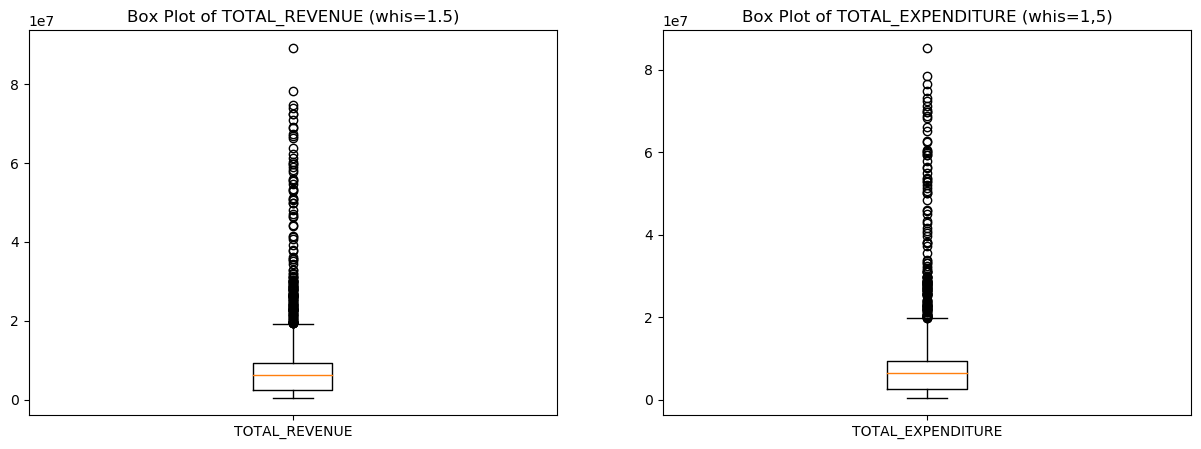

In [27]:
# Take an inital look at the "TOTAL_REVENUE" AND "TOTAL_EXPENDITURE" columns with a set of boxplots
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(ed_replace1["TOTAL_REVENUE"])
plt.title("Box Plot of TOTAL_REVENUE (whis=1.5)")
plt.xticks([1], ["TOTAL_REVENUE"])

plt.subplot(1,2,2)
plt.boxplot(ed_replace1["TOTAL_EXPENDITURE"])
plt.title("Box Plot of TOTAL_EXPENDITURE (whis=1,5)")
plt.xticks([1], ["TOTAL_EXPENDITURE"])

plt.show();

As illustrated above both variables show evidence of outliers.

### _2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them._

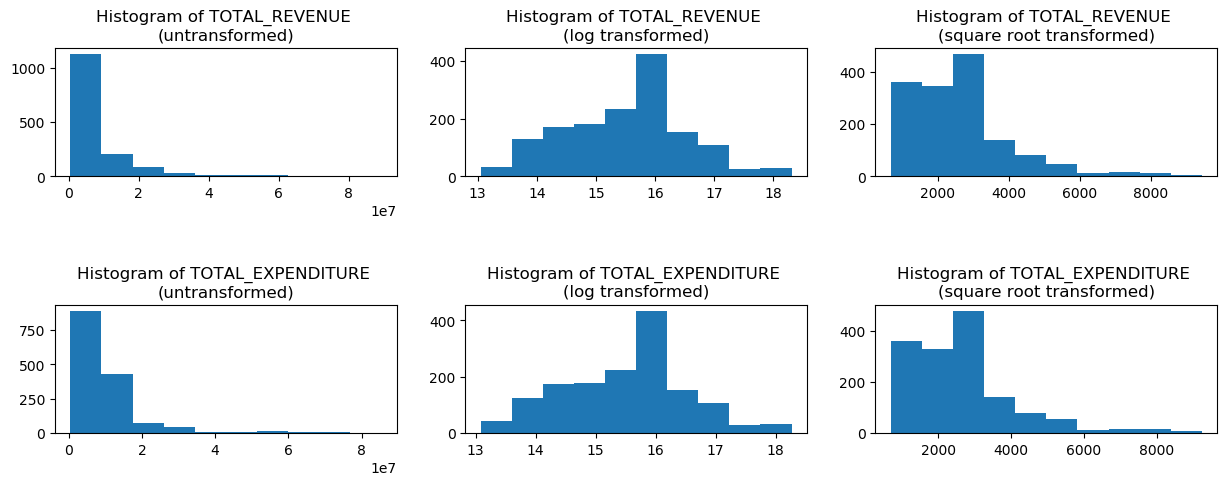

In [43]:
# Perform transformaitons on the data to bring it closer to a normal distribution
plt.figure(figsize=(15,5))

plt.subplot(2,3,1) 
plt.hist(ed_replace1["TOTAL_REVENUE"])
plt.title(f"Histogram of TOTAL_REVENUE \n(untransformed)")

plt.subplot(2,3,2)
plt.hist(np.log(ed_replace1["TOTAL_REVENUE"]))
plt.title(f"Histogram of TOTAL_REVENUE \n(log transformed)")

plt.subplot(2,3,3)
plt.hist(np.sqrt(ed_replace1["TOTAL_REVENUE"]))
plt.title(f"Histogram of TOTAL_REVENUE \n(square root transformed)")

plt.subplot(2,3,4) 
plt.hist(ed_replace1["TOTAL_EXPENDITURE"])
plt.title(f"Histogram of TOTAL_EXPENDITURE \n(untransformed)")

plt.subplot(2,3,5)
plt.hist(np.log(ed_replace1["TOTAL_EXPENDITURE"]))
plt.title(f"Histogram of TOTAL_EXPENDITURE \n(log transformed)")

plt.subplot(2,3,6)
plt.hist(np.sqrt(ed_replace1["TOTAL_EXPENDITURE"]))
plt.title(f"Histogram of TOTAL_EXPENDITURE \n(square root transformed)")

plt.subplots_adjust(hspace=1)

plt.show();

It appears as though the log transformation will provide the best fit for a normal curve

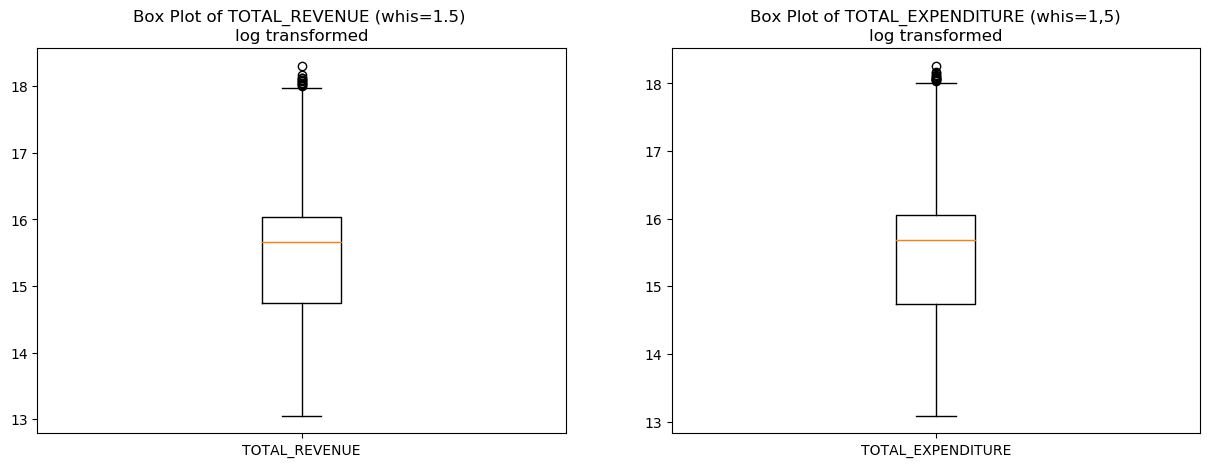

In [79]:
# Take another look at the outliers using a log transformation
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(np.log(ed_replace1["TOTAL_REVENUE"]))
plt.title(f"Box Plot of TOTAL_REVENUE (whis=1.5) \nlog transformed")
plt.xticks([1], ["TOTAL_REVENUE"])

plt.subplot(1,2,2)
plt.boxplot(np.log(ed_replace1["TOTAL_EXPENDITURE"]))
plt.title(f"Box Plot of TOTAL_EXPENDITURE (whis=1,5)\nlog transformed")
plt.xticks([1], ["TOTAL_EXPENDITURE"])

plt.show();

The logarithmic transformation has signifigantly reduced the number of outliers for the TOTAL_REVENUE AND TOTAL_EXPENDITURE variables but I might be able to do better, try a winsorization.

In [75]:
winsorized_total_revenue = winsorize(ed_replace1["TOTAL_REVENUE"], (0, 0.105))
winsorized_total_expenditure = winsorize(ed_replace1["TOTAL_EXPENDITURE"], (0, 0.105))

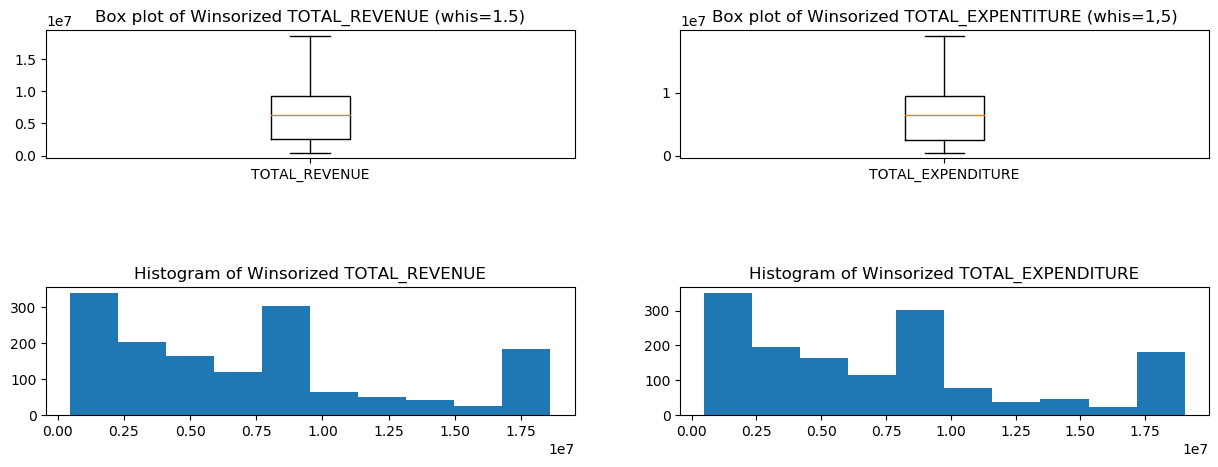

In [80]:
# Create some boxplots for the winsorized values
plt.figure(figsize=(15,5)) 

plt.subplot(2,2,1)
plt.boxplot(winsorized_total_revenue)
plt.title("Box plot of Winsorized TOTAL_REVENUE (whis=1.5)")
plt.xticks([1], ["TOTAL_REVENUE"])

plt.subplot(2,2,2)
plt.boxplot(winsorized_total_expenditure)
plt.title("Box plot of Winsorized TOTAL_EXPENTITURE (whis=1,5)")
plt.xticks([1], ["TOTAL_EXPENDITURE"])

plt.subplot(2,2,3)
plt.hist(winsorized_total_revenue)
plt.title("Histogram of Winsorized TOTAL_REVENUE")

plt.subplot(2,2,4)
plt.hist(winsorized_total_expenditure)
plt.title("Histogram of Winsorized TOTAL_EXPENDITURE")

plt.subplots_adjust(hspace=1)

plt.show();

### _3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable._

In [158]:
# Budget Deficit untransformed
budget_deficit = ed_replace1["TOTAL_REVENUE"] - ed_replace1["TOTAL_EXPENDITURE"]

# Winsorized Budget Deficit
budget_deficit_winsorized = winsorize(ed_replace1["TOTAL_REVENUE"] - ed_replace1["TOTAL_EXPENDITURE"], 
    (0.11, 0.11))

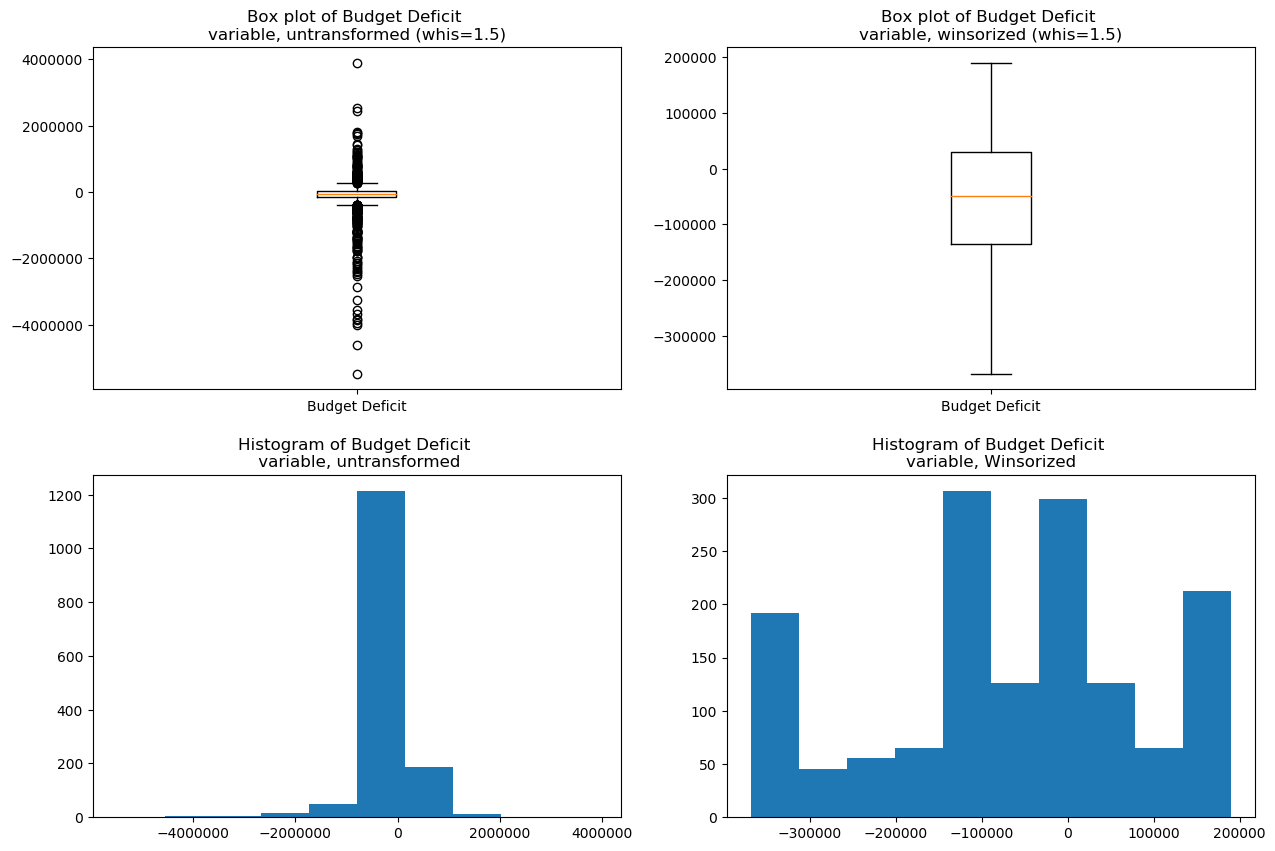

In [159]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.boxplot(budget_deficit)
plt.title(f"Box plot of Budget Deficit \nvariable, untransformed (whis=1.5)")
plt.xticks([1], ["Budget Deficit"])

plt.subplot(2,2,2)
plt.boxplot(budget_deficit_winsorized)
plt.title(f"Box plot of Budget Deficit \nvariable, winsorized (whis=1.5)")
plt.xticks([1], ["Budget Deficit"])

plt.subplot(2,2,3)
plt.hist(budget_deficit)
plt.title(f"Histogram of Budget Deficit \n variable, untransformed")

plt.subplot(2,2,4)
plt.hist(budget_deficit_winsorized)
plt.title(f"Histogram of Budget Deficit \nvariable, Winsorized")

plt.subplots_adjust(hspace=0.25)

plt.show()

Performing a log transform or square root transform on the Budget Deficit variable did not produce the intended outcome of outlier reduction but Windsorization did.

### _4. This time, fill in the missing values using interpolation (extrapolation)._

In [160]:
budget_deficit_interpolated = budget_deficit.interpolate()

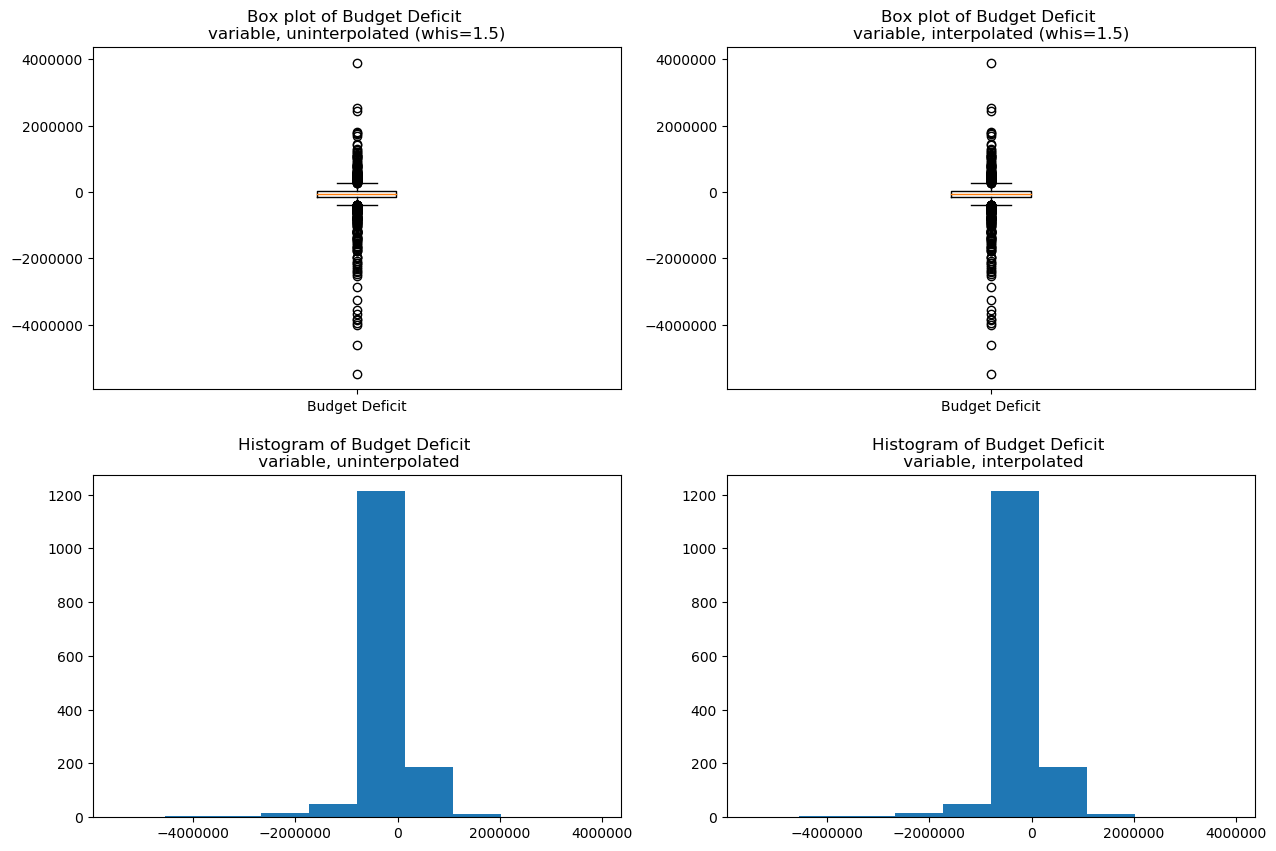

In [161]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.boxplot(budget_deficit)
plt.title(f"Box plot of Budget Deficit \nvariable, uninterpolated (whis=1.5)")
plt.xticks([1], ["Budget Deficit"])

plt.subplot(2,2,2)
plt.boxplot(budget_deficit_interpolated)
plt.title(f"Box plot of Budget Deficit \nvariable, interpolated (whis=1.5)")
plt.xticks([1], ["Budget Deficit"])

plt.subplot(2,2,3)
plt.hist(budget_deficit)
plt.title(f"Histogram of Budget Deficit \n variable, uninterpolated")

plt.subplot(2,2,4)
plt.hist(budget_deficit)
plt.title(f"Histogram of Budget Deficit \n variable, interpolated")

plt.subplots_adjust(hspace=0.25)

plt.show()

### _5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?_

In [142]:
print(f"""
[Max:]
Budget Deficit:              | {budget_deficit.max():>{13},.4f}
Budget Deficit Winsorized:   | {pd.Series(budget_deficit_winsorized).max():>{13},.4f}
Budget Deficit Interpolated: | {budget_deficit_interpolated.max():>{13},.4f}

[Min:]
Budget Deficit:              | {budget_deficit.min():>{13},.4f}
Budget Deficit Winsorized:   | {pd.Series(budget_deficit_winsorized).min():>{13},.4f}
Budget Deficit Interpolated: | {budget_deficit_interpolated.min():>{13},.4f}

[Means:]
Budget Deficit:              | {budget_deficit.mean():>{13},.4f}
Budget Deficit Winsorized:   | {pd.Series(budget_deficit_winsorized).mean():>{13},.4f}
Budget Deficit Interpolated: | {budget_deficit_interpolated.mean():>{13},.4f}

[Medians:]
Budget Deficit:              | {budget_deficit.median():>{13},.4f}
Budget Deficit Winsorized:   | {pd.Series(budget_deficit_winsorized).median():>{13},.4f}
Budget Deficit Interpolated: | {budget_deficit_interpolated.median():>{13},.4f}

[Modes:]
Budget Deficit:              | {budget_deficit.mode()[0]:>{13},.4f}
Budget Deficit Winsorized:   | {pd.Series(budget_deficit_winsorized).mode()[0]:>{13},.4f}
Budget Deficit Interpolated: | {budget_deficit_interpolated.mode()[0]:>{13},.4f}

[Standard Deviation:]
Budget Deficit:              | {budget_deficit.std():>{13},.4f}
Budget Deficit Winsorized:   | {pd.Series(budget_deficit_winsorized).std():>{13},.4f}
Budget Deficit Interpolated: | {budget_deficit_interpolated.std():>{13},.4f}


""")



[Max:]
Budget Deficit:              | 3,897,129.0000
Budget Deficit Winsorized:   |  189,922.0000
Budget Deficit Interpolated: | 3,897,129.0000

[Min:]
Budget Deficit:              | -5,487,742.0000
Budget Deficit Winsorized:   | -368,853.0000
Budget Deficit Interpolated: | -5,487,742.0000

[Means:]
Budget Deficit:              | -104,599.0102
Budget Deficit Winsorized:   |  -65,453.4947
Budget Deficit Interpolated: | -104,599.0102

[Medians:]
Budget Deficit:              |  -48,493.5000
Budget Deficit Winsorized:   |  -48,493.5000
Budget Deficit Interpolated: |  -48,493.5000

[Modes:]
Budget Deficit:              | -104,599.0102
Budget Deficit Winsorized:   | -104,599.0102
Budget Deficit Interpolated: | -104,599.0102

[Standard Deviation:]
Budget Deficit:              |  531,077.0457
Budget Deficit Winsorized:   |  164,003.8842
Budget Deficit Interpolated: |  531,077.0457



### _6. If our variable of interest is the budget deficit variable, which method do you think is the most appropriate one in dealing with the outliers in this variable. The method in the third question or the one in the fourth question?_

I am inclined to use the winsorized version of the budget deficit variable because it siginifigantly redues the number of outliers.